In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('sample.png')
img_RGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)

### Generating the Input for RISC-V Processor

In [ ]:
x = []
num = []
for i in img_RGB:
    for j in i:
        for k in j:
            x.append("0"*(34 - len(bin(k))) + bin(k)[2:])
            num.append(k)

for i,j in enumerate(x):
    txt = "".join(["data_ram[",str(i),"] = {32'b",j,"};"])
    print(txt + " //" + str(num[i]))

### Generating the Image using the Output of the RISC-V Processor

In [ ]:
with open("output.txt") as file:
    x = file.read().split("\n")

y = []
for i in x:
    y.append(int(i[5:]))

img = np.array(y,dtype=np.int32)
img = img.reshape(10,10)
print(img)

### Generating the Image using the python program

In [4]:
shape = (10,10)

# Weights
R = 4 #1/0.3
G = 2 #1/0.59
B = 8 #1/0.11

output = np.ndarray(shape,dtype=np.int64) 

for i in range(shape[0]):
    for j in range(shape[1]):
        x = img_RGB[i][j]

        r = x[0]/R
        g = x[1]/G
        b = x[2]/B

        y = r + g + b
        output[i][j] = y

### Results

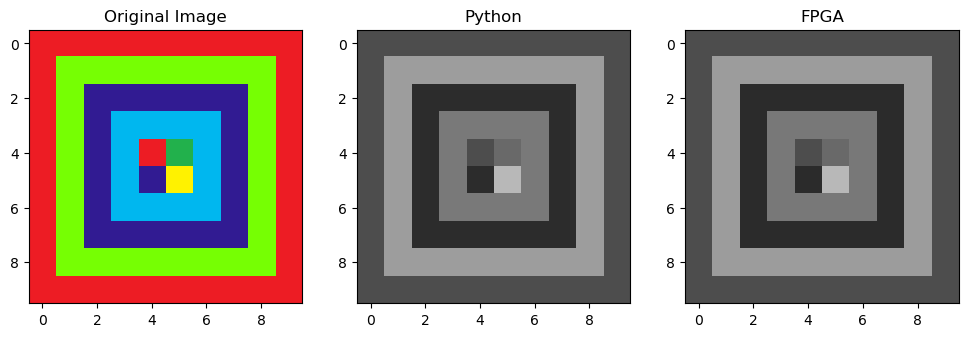

In [5]:
f,ax = plt.subplots(1,3,figsize = [12,5])
ax[0].imshow(img_RGB)
ax[1].imshow(output,cmap = 'gray',vmin = 0,vmax = 255)
ax[2].imshow(img,cmap = 'gray',vmin = 0,vmax = 255)
ax[0].set_title("Original Image")
ax[1].set_title("Python")
ax[2].set_title("FPGA")
plt.show()